# Data Engineering Project - Airplane Crashes

## Introduction
In this jupyter notebook I will explore the data that was found on Kaggle about airplane crashes to see if I can find interesting insights. This will be done with the following research questions: 

1. In which year were the most airplane crashes?
2. Which top three airplane models have caused the most crashes and which airplane model the most fatalities?
3. Which airline has caused the most death?
4. What are the chances of surviving an airplane crashes? (a.k.a: What is the survival rate of airplane crashes?)
5. Are airplanes getting safer, e.g. less deaths and crashes?

The dataset that is being used contains data of airplane crashes, from civil and commercial to military transport worldwide from the 17th of September 1908 untill the 8th of June 2009.

To conduct this research, I will need the following libraries:
- <code>pandas</code>
- <code>numpy</code>
- <code>seaborn</code>
- <code>matplotlib</code>

In [1]:
#importing the libraries and dataset

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

airplanes_dataset = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

## Data Exploration
To see what columns the imported dataset has, we can print <code>pandas.DataFrame.head</code>.

In [2]:
airplanes_dataset.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


With <code>pandas.DataFrame.info</code> we can see how many rows, columns, non-null values and memory usage. there are in total.

In [3]:
airplanes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


As can be seen above the dataset consists of 5268 rows, in this case airplane crashes and 13 features:

- Date
- Time
- Location
- Operator
- Flight #
- Route
- Type
- Registration
- cn/In 
- Aboard 
- Fatalities 
- Ground*
- Summary 

*This column represents people who were killed by the plane on the ground/land when the plane crashed.

To find whether the dataset has missing values, I will use the following:

In [4]:
airplanes_dataset.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

## Data Cleaning

As can be seen in the output above, some rows are missing, especially of the column "Time" (2219 out of 5268) and "Flight #"(4199 out of 5268). To answer the research questions, the following columns can be deleted first:

- Time
- Flight #
- Route
- Registration
- cn/In 
- Summary 

Later on per Research Question more Data Cleaning will be done, for example getting rid of the null values.

In [5]:
airplanes = airplanes_dataset.drop(columns=['Time', 'Flight #', 'Route', 'Registration', 'cn/In', 'Summary'])
airplanes

,Date,Location,Operator,Type,Aboard,Fatalities,Ground
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0
...,...,...,...,...,...,...,...
5263,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2.0
5264,05/26/2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,NaN
5265,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,0.0
5266,06/07/2009,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0


## Data Visualisation And Answers To The Research Questions

### 1. In which year were the most airplane crashes?

The datetype of the column "Date" is currently an object and not a datetime. In order to extract the year from <code>pandas</code> this needs to be converted first to the correct datetype. Important to note that in the Section Data Exploration, you can see that the "Date" column has zero null values, so this column can be used, without cleaning. 

In [6]:
for columnn in airplanes.columns:                              
    if airplanes[columnn].dtype == 'object':         # loop through the columns of DataFrame airplanes and check if the dtype is object 
        try:                                         # the try statement can handle any exceptions or errors that occur
            airplanes[columnn] = pd.to_datetime(airplanes[columnn]) #change the column type into a datetime dtype
        except ValueError:
            pass

To check whether the type of the data in the column "Date" has changed I will print the following again:

In [7]:
airplanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5268 non-null   datetime64[ns]
 1   Location    5248 non-null   object        
 2   Operator    5250 non-null   object        
 3   Type        5241 non-null   object        
 4   Aboard      5246 non-null   float64       
 5   Fatalities  5256 non-null   float64       
 6   Ground      5246 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 288.2+ KB


A new column called "Year" will be added at the end.

In [8]:
airplanes['Year'] = pd.DatetimeIndex(airplanes['Date']).year
# airplanes['Month'] = pd.DatetimeIndex(airplanes['Date']).month #extra column, not needed for this research question
airplanes.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Year
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,1908
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,1912
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,1913
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,1913
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,1913


In the table above we can see that two new columns have been added at the end named "Year" and Month. I have added the "Month" column as extra, since it may also show some interesting insights. To answer the first RQ I will make use of <code>pandas.Series.value_counts</code>.

In [9]:
airplanes.Year.value_counts()[:10] #to answer RQ1 I am not interested in all the years, so only the top 10 years of the most accidents are shown
# airplanes.Month.value_counts()[:5] #(not needed for RQ1)

1972    104
1968     96
1989     95
1967     91
1979     89
1973     89
1991     88
1970     87
1994     87
1976     86
Name: Year, dtype: int64

To visualise this I will make use of <code>seaborn.histplot</code>. In the output above, according to the dataset the most crashes happened in 1972. This can also be seen in the visualisation Fig.1.

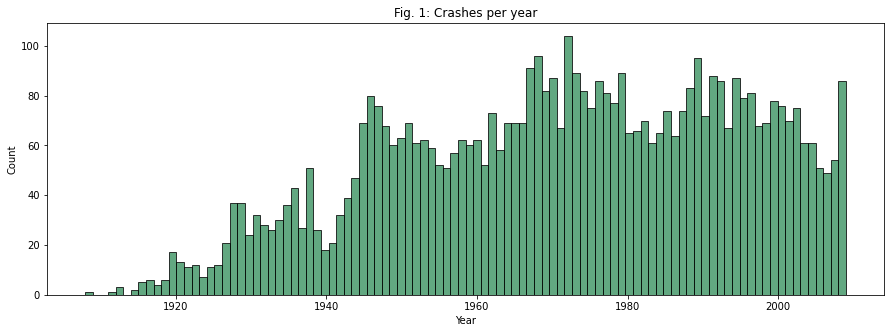

In [10]:
plt.figure(figsize=(15, 5))
per_year_plot = sns.histplot(data = airplanes, x = 'Year', bins = 100, color = "seagreen")
per_year_plot.set(title = "Fig. 1: Crashes per year")
fig = per_year_plot.get_figure()
fig.savefig('per_year_plot.png')

# per_month_plot = sns.histplot(data = airplanes, x = 'Month', bins = 12) #(not needed for RQ1)
# per_month_plot.set(title = "Crashes per month")

### 2. Which top three airplane models have caused the most crashes and which airplane model the most fatalities?

In the Section Data Exploration you can see that the "Type" column that describes the airplane model has 27 null values, these will be removed first.

In [11]:
# check_nan_for_Type = airplanes['Type'].isnull().sum() # double check the amount of null values in the column Type
# check_nan_for_Type

airplanes_Type = airplanes[airplanes['Type'].notna()]
check_nan_again_for_Type = airplanes_Type['Type'].isnull().sum() # double check the amount of null values in the column Type will now be 0 instead of 27
check_nan_again_for_Type #output should be equal to zero

0

With the previous print statement you can see that there are 0 null values now in the column "Type". Now we can see wich airplane models have caused the most accidents.

In [12]:
airplanes_Type.Type.value_counts()[:3] # top 3 of airplane models that have cause the most accidents
# airplanes_Type.Type.value_counts()[:10]

Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Name: Type, dtype: int64

The answer to which airplane models have caused the most crashes: 
1. Douglas DC-3 
2. de Havilland Canada DHC-6 Twin Otter 300 
3. Douglas C-47A  

The airplanes are pictured below from left to right. 

<img src="DouglasDC3.jpeg" width="300" height="200">
<img src="De_Havilland_Canada.jpeg" width="300" height="200">
<img src="DouglasC-47A.jpeg" width="300" height="200">


But now, which airplane model has caused the most fatalities? 

In [13]:
airplanes_type_fatal = airplanes_Type.groupby('Type')[['Fatalities']].sum() #first amount of fatalities per airplane type are summed
airplanes_type_fatal = airplanes_type_fatal.rename(columns={'Type': 'Fatalities'})
airplanes_type_fatal = airplanes_type_fatal.sort_values(by='Fatalities', ascending=False)
airplanes_type_fatal_top10 = airplanes_type_fatal.head(10) 

airplanes_type_fatal_top10 #will print the top 10 airplane models that have caused the most fatalities

,Fatalities
Type,
Douglas DC-3,4793.0
Antonov AN-26,1068.0
Douglas DC-6B,1055.0
Douglas C-47,1046.0
McDonnell Douglas DC-9-32,951.0
Douglas DC-4,930.0
Ilyushin IL-18B,852.0
Yakovlev YAK-40,834.0
Tupolev TU-134A,809.0


In the table above you can see the top 10 of Fatalities per Airplane Model. According to the data the Douglas DC-3 has also caused the most fatalities. Important to note that whether an airplane model has crashed the most often does not automatically mean it has also has the highest amount of fatalities. For example, number 2 of this list is the Antonov AN-26 model, which was on the 7th place of most crashes (36 crashes in total). This can be seen when you print <code>airplanes_Type.Type.value_counts()[:10]</code>

To visualise these results, I will use <code>seaborn.barplot</code>, see Figure 2.

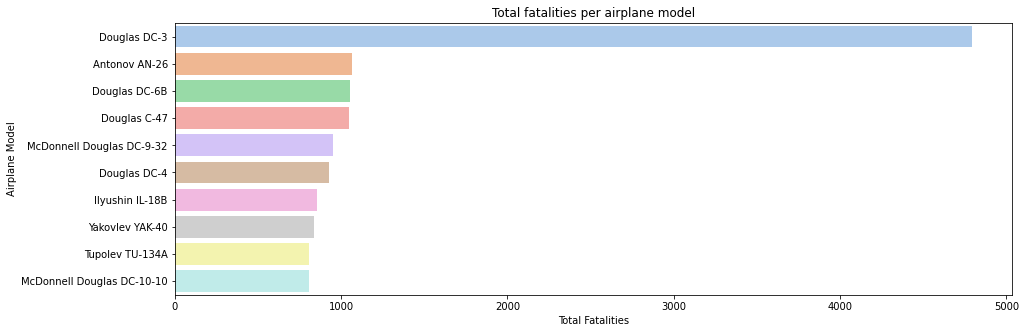

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(y=airplanes_type_fatal_top10.index, x="Fatalities", data=airplanes_type_fatal_top10, palette="pastel")
plt.xlabel('Total Fatalities')
plt.ylabel('Airplane Model')
plt.title('Total fatalities per airplane model')
plt.show()

### 3. Which airline has caused the most death?

In this specific case, the total amount of death can be calculated by adding two columns together. According to the data, when comparing the column "Aboard" with "Fatalities", not all passengers on each airplane crash have died. I will only add the column "Fatalities" to the column "Ground", since some crashes also killed people who were on the ground when the plane crashed.

The column "Fatalities" has 12 null values and the column "Ground" has 22 null values that will be removed first.

In [15]:
airplanes = airplanes[airplanes['Fatalities'].notna()]
airplanes = airplanes[airplanes['Ground'].notna()]

Now a new column will be made with the total amount of death of each crash.

In [16]:
airplanes["Total Death"] = airplanes["Fatalities"] + airplanes["Ground"]
airplanes.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Year,Total Death
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,1908,1.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,1912,5.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,1913,1.0
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,1913,14.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,1913,30.0


In [17]:
airplanes_death_airline = airplanes.groupby('Operator')[['Total Death']].sum() 
airplanes_death_airline = airplanes_death_airline.rename(columns={"Operator": "Total Death"})
airplanes_death_airline = airplanes_death_airline.sort_values(by='Total Death', ascending=False)
airplanes_death_airline_top10 = airplanes_death_airline.head(10)

airplanes_death_airline_top10

,Total Death
Operator,
Aeroflot,7184.0
American Airlines,4310.0
Military - U.S. Air Force,3866.0
United Air Lines,3770.0
Air France,1739.0
Pan American World Airways,1322.0
Military - U.S. Army Air Forces,1150.0
AVIANCA,944.0
Turkish Airlines (THY),891.0


In the table above you can see the top 10 of Total Death per Operator. According to the data the Aeroflot has caused the most Total Death, 7184 to be precise. 

To showcase these results, I will use <code>seaborn.barplot</code> again, see Figure 3.

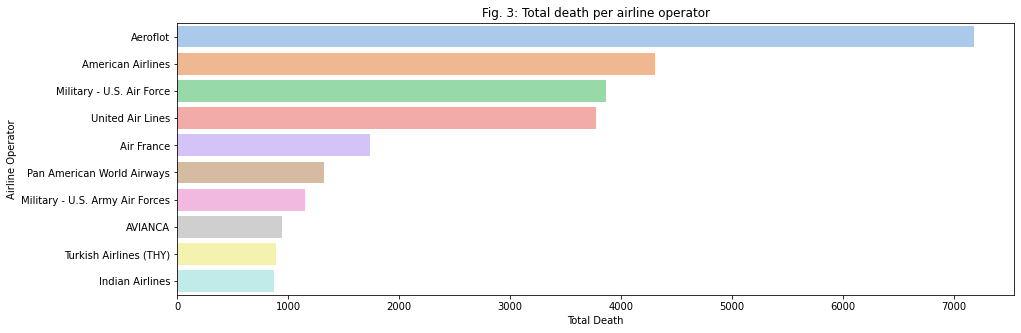

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(y=airplanes_death_airline_top10.index, x="Total Death", data=airplanes_death_airline_top10, palette="pastel")
plt.xlabel('Total Death')
plt.ylabel('Airline Operator')
plt.title('Fig. 3: Total death per airline operator')
plt.show()

### 4. What are the chances of surviving an airplane crashes? (a.k.a: What is the survival rate of airplane crashes?)

First the null values have to be removed from the column "Aboard" and then a new column will be created where the survival rate will be displayed. In this case I will only take the column "Fatalities" and "Aboard" into account, since the question is focused on surviving an airplane crash if you are inside of the airplane. 

The survival rate is calculated by dividing the amount Aboard minus the Fatalities by Aboard times 100, to calculate the percentage.

In [19]:
airplanes = airplanes[airplanes['Aboard'].notna()]
airplanes['Survivors'] = airplanes['Aboard'] - airplanes['Fatalities'] # new column for amount of survivors per crash
airplanes['Survival Chances'] = 100 * airplanes['Survivors'] / airplanes['Aboard'] # new column that shows the survival rate in percentages
airplanes.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Year,Total Death,Survivors,Survival Chances
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,1908,1.0,1.0,50.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,1912,5.0,0.0,0.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,1913,1.0,0.0,0.0
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,1913,14.0,6.0,30.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,1913,30.0,0.0,0.0


The results will be visualised using <code>seaborn.lineplot</code>. In Figure 4 you can see a line chart with 95% confidence interval. This type of chart provides a data range, which can be useful when making predictions. In conclusion, the max percentage of surviving an airplane crash is 50%, but on average the survival chances are between 10% and 30% (see Figure 4). Note that the dataset does not include newer flights than 2009.

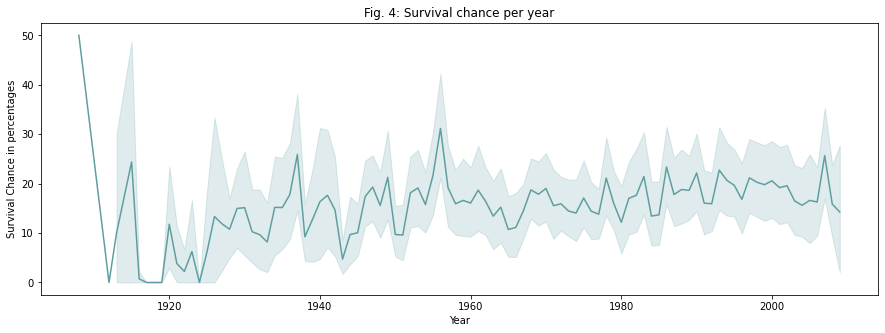

In [20]:
# sns.relplot(x="Year", y="Survival Chances", data=airplanes)
plt.figure(figsize=(15, 5))
sns.lineplot(data = airplanes, x='Year', y='Survival Chances', color='cadetblue')
plt.xlabel('Year')
plt.ylabel('Survival Chance in percentages')
plt.title('Fig. 4: Survival chance per year')
plt.show()

### 5. Are airplanes getting safer, e.g. less deaths and crashes?

To answer this question, you can see in Fig. 1: Crashes per year, that the amount of crashes does not go down as the years pass by. Important to note is that the dataset that is used can be misleading, since the number of flights has also increased over the years. The dataset only includes crashes and not the actual amount of airplanes that have not crashed.

According to [Statista](https://bit.ly/36JyWS8) the amount of flights have increased in 2009 from 25.9 to 38.9 million flights in 2019. This would mean that the chances of survival would also change. 